# Hackathon: From Raw Data to ML-Ready Dataset
## Insight-Driven EDA and End-to-End Feature Engineering on Airbnb Data Using pandas and Plotly

### What is a Hackathon?

A hackathon is a fast-paced, collaborative event where participants use data and technology to solve a real problem end-to-end.  
In this hackathon, you will work with a **real-world Airbnb dataset** and complete two interconnected goals:

- Produce a **high-quality exploratory data analysis (EDA)** using `pandas` and `plotly`, extracting meaningful insights, trends, and signals from the data.  
- Design and deliver a **clean, feature-rich, ML-ready dataset** that will serve as the foundation for a follow-up hackathon focused on building and evaluating machine learning models.

Your task is to **get the most out of the data**: uncover structure and patterns through EDA, and engineer informative features (numerical, categorical, temporal, textual (TF–IDF), and optionally image-based) to maximize the predictive power of the final dataset.

<div class="alert alert-success">
<b>About the Dataset</b>

<u>Context</u>

The data comes from <a href="https://insideairbnb.com/get-the-data/">Inside Airbnb</a>, an open project that publishes detailed, regularly updated datasets for cities around the world.  
Each city provides three main CSV files:

- <b>listings.csv</b> — property characteristics, host profiles, descriptions, amenities, etc.  
- <b>calendar.csv</b> — daily availability and pricing information for each listing.  
- <b>reviews.csv</b> — guest feedback and textual reviews.

These datasets offer a rich view of the short-term rental market, including availability patterns, pricing behavior, host attributes, and guest sentiment.  

<u>Inspiration</u>

Your ultimate objective is to create a dataset suitable for training a machine learning model that predicts whether a specific Airbnb listing will be <b>available on a given date</b>, using property attributes, review information, and host characteristics.
</div>

<div class="alert alert-info">
<b>Task</b>

Using one city of your choice from Inside Airbnb, create an end-to-end pipeline that:

1. Loads and explores the raw data (EDA).  
2. Engineers features (numerical, categorical, temporal, textual TF–IDF, etc.).  
3. Builds a unified ML-ready dataset.  

Please remember to add comments explaining your decisions. Comments help us understand your thought process and ensure accurate evaluation of your work. This assignment requires code-based solutions—**manually calculated or hard-coded results will not be accepted**. Thoughtful comments and visualizations are encouraged and will be highly valued.

- Write your solution directly in this notebook, modifying it as needed.
- Once completed, submit the notebook in **.ipynb** format via Moodle.
    
<b>Collaboration Requirement: Git & GitHub</b>

You must collaborate with your team using a **shared GitHub repository**.  
Your use of Git is part of the evaluation. We will specifically look at:

- Commit quality (clear messages, meaningful steps).  
- Balanced participation across team members.  
- Use of branches.  
- Ability to resolve merge conflicts appropriately.  
- A clean, readable project history that reflects real collaboration.

Good Git practice is **part of your grade**, not optional.
</div>
<div class="alert alert-danger">
    You are free to add as many cells as you wish as long as you leave untouched the first one.
</div>

<div class="alert alert-warning">

<b>Hints</b>

- Text columns often carry substantial predictive power, use text-vectorization methods to extract meaningful features.  
- Make sure all columns use appropriate data types (categorical, numeric, datetime, boolean). Correct dtypes help prevent subtle bugs and improve performance.  
- Feel free to enrich the dataset with any additional information you consider useful: engineered features, external data, derived temporal features, etc.  
- If the dataset is too large for your computer, use <code>.sample()</code> to work with a subset while preserving the logic of your pipeline.  
- Plotly offers a wide variety of powerful visualizations, experiment creatively, but always begin with a clear analytical question: *What insight am I trying to uncover with this plot?*

</div>




<div class="alert alert-danger">
<b>Submission Deadline:</b> Wednesday, December 3rd, 12:00

Start with a simple, working pipeline.  
Do not over-complicate your code too much. Start with a simple working solution and refine it if you have time.
</div>

<div class="alert alert-danger">
    
You may add as many cells as you want, but the **first cell must remain exactly as provided**. Do not edit, move, or delete it under any circumstances.
</div>


In [32]:
# LEAVE BLANK

### Team Information

Fill in the information below.  
All fields are **mandatory**.

- **GitHub Repository URL**: Paste the link to the team repo you will use for collaboration.
- **Team Members**: List all student names (and emails or IDs if required).

Do not modify the section title.  
Do not remove this cell.


In [33]:
# === Team Information (Mandatory) ===
# Fill in the fields below.

GITHUB_REPO = ""       # e.g. "https://github.com/myteam/airbnb-hackathon"
TEAM_MEMBERS = [
    # "Full Name 1",
    # "Full Name 2",
    # "Full Name 3",
]

GITHUB_REPO, TEAM_MEMBERS


('', [])

In [34]:
import pandas as pd

calendar = pd.read_csv("calendar.csv.gz").sample(frac=0.1, random_state=42)
listings = pd.read_csv("listings.csv.gz").sample(frac=0.1, random_state=42)
reviews = pd.read_csv("reviews.csv.gz").sample(frac=0.1, random_state=42)
neighbourhoods = pd.read_csv("neighbourhoods.csv").sample(frac=0.1, random_state=42)


In [35]:
print(calendar.head())
print("\n")
print("-----------------------------------------")
print("\n")
print(listings.head())
print("\n")
print("-----------------------------------------")
print("\n")
print(reviews.head())
print("\n")
print("-----------------------------------------")
print("\n")
print(neighbourhoods.head())

                  listing_id        date available  price  adjusted_price  \
1564889  1252846196342561863  2026-02-05         f    NaN             NaN   
2494049             22046427  2025-09-28         f    NaN             NaN   
2557396             27109062  2026-04-18         t    NaN             NaN   
2816625   669277618288120624  2026-07-05         f    NaN             NaN   
1200010  1130959676966202372  2026-06-06         t    NaN             NaN   

         minimum_nights  maximum_nights  
1564889              14             365  
2494049               2            1125  
2557396              30            1125  
2816625              14            1125  
1200010               3             365  


-----------------------------------------


                       id                                       listing_url  \
7641  1477722919173634412  https://www.airbnb.com/rooms/1477722919173634412   
2166             54376457             https://www.airbnb.com/rooms/54376457   
34

In [36]:
# Join the calender, listings and reviews dataframes into a single dataframe using the id as my key.
df = pd.merge(calendar, listings, left_on='listing_id', right_on='id', how='inner')
df = pd.merge(df, reviews, left_on='listing_id', right_on='listing_id', how='inner')
df.shape


(162541, 91)

In [37]:
df.head()

,listing_id,date_x,available,price_x,adjusted_price,minimum_nights_x,maximum_nights_x,id_x,listing_url,scrape_id,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id_y,date_y,reviewer_id,reviewer_name,comments
0,562191517654979125,2026-08-21,t,NaN,NaN,4,1125,562191517654979125,https://www.airbnb.com/rooms/562191517654979125,20250923203019,...,3,3,0,0,0.61,1448484241119290469,2025-06-21,203208628,Harry,"Would recommend, great location at a fair pric..."
1,562191517654979125,2026-08-21,t,NaN,NaN,4,1125,562191517654979125,https://www.airbnb.com/rooms/562191517654979125,20250923203019,...,3,3,0,0,0.61,586714725395692971,2022-03-20,445197101,Monica,"Piso centrico, buena ubicacion y muy bien equi..."
2,562191517654979125,2026-08-21,t,NaN,NaN,4,1125,562191517654979125,https://www.airbnb.com/rooms/562191517654979125,20250923203019,...,3,3,0,0,0.61,1431802704596061957,2025-05-29,43058925,Michela,L'alloggio di Fernando é perfetta per spostars...
3,16084515,2026-06-05,f,NaN,NaN,7,999,16084515,https://www.airbnb.com/rooms/16084515,20250923203019,...,7,7,0,0,0.37,970873967509206589,2023-09-01,1490963,Sarah,Nous avions réservé cet appartement pour mes p...
4,16084515,2026-06-05,f,NaN,NaN,7,999,16084515,https://www.airbnb.com/rooms/16084515,20250923203019,...,7,7,0,0,0.37,1499961842389104966,2025-08-31,360880032,Lynn,Our stay was lovely thanks to Olga’s great apa...


In [38]:
df.tail()

,listing_id,date_x,available,price_x,adjusted_price,minimum_nights_x,maximum_nights_x,id_x,listing_url,scrape_id,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id_y,date_y,reviewer_id,reviewer_name,comments
162536,53132617,2026-09-02,t,NaN,NaN,10,365,53132617,https://www.airbnb.com/rooms/53132617,20250923203019,...,4,4,0,0,1.31,1059988871638368759,2024-01-02,140294244,Andrew,This is a lovely Air B&B and exactly as listed...
162537,53132617,2026-09-02,t,NaN,NaN,10,365,53132617,https://www.airbnb.com/rooms/53132617,20250923203019,...,4,4,0,0,1.31,1015789681827259986,2023-11-02,59350877,Hubert,Great location near to beach and some nice res...
162538,53132617,2026-09-02,t,NaN,NaN,10,365,53132617,https://www.airbnb.com/rooms/53132617,20250923203019,...,4,4,0,0,1.31,994107387066615112,2023-10-03,12655344,Ramiro,Jorge was super friendly from the booking fay ...
162539,53132617,2026-09-02,t,NaN,NaN,10,365,53132617,https://www.airbnb.com/rooms/53132617,20250923203019,...,4,4,0,0,1.31,1020189264295941518,2023-11-08,166756668,Claus,Super experience. The apartment fully met our ...
162540,53132617,2026-09-02,t,NaN,NaN,10,365,53132617,https://www.airbnb.com/rooms/53132617,20250923203019,...,4,4,0,0,1.31,1233916661666923279,2024-08-29,58335416,Myriam,"Jorge ist ein wunderbarer Gastgeber, der sich ..."


In [39]:
print(f"There are {df.shape[0]} rows, and {df.shape[1]} columns.")

There are 162541 rows, and 91 columns.


In [40]:
df.duplicated().any()

np.False_

In [41]:
def df_quick_info(df):
    return (pd.DataFrame({
        'data_type': df.dtypes, 'num_unique': df.nunique(), 'has_na': df.isna().any(), 'na_count': df.isna().sum()}))

df_quick_info(df)

,data_type,num_unique,has_na,na_count
listing_id,int64,503,False,0
date_x,object,366,False,0
available,object,2,False,0
price_x,float64,0,True,162541
adjusted_price,float64,0,True,162541
...,...,...,...,...
id_y,int64,4416,False,0
date_y,object,2105,False,0
reviewer_id,int64,4403,False,0
reviewer_name,object,2419,False,0


In [42]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,162541.0,3.122961e+17,4.768329e+17,3.466950e+05,1.490921e+07,2.518547e+07,7.346942e+17,1.487794e+18
price_x,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adjusted_price,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minimum_nights_x,162541.0,4.569758e+00,6.473790e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.000000e+02
maximum_nights_x,162541.0,6.686266e+02,4.928324e+02,1.000000e+00,9.000000e+01,1.124000e+03,1.125000e+03,1.125000e+03
id_x,162541.0,3.122961e+17,4.768329e+17,3.466950e+05,1.490921e+07,2.518547e+07,7.346942e+17,1.487794e+18
scrape_id,162541.0,2.025092e+13,4.235560e+01,2.025092e+13,2.025092e+13,2.025092e+13,2.025092e+13,2.025092e+13
host_id,162541.0,1.657668e+08,1.809008e+08,8.794400e+04,2.777396e+07,1.011111e+08,2.087041e+08,7.046350e+08
host_listings_count,162541.0,9.368153e+00,2.056079e+01,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,1.200000e+02
host_total_listings_count,162541.0,1.163477e+01,2.557627e+01,1.000000e+00,2.000000e+00,4.000000e+00,7.000000e+00,1.810000e+02


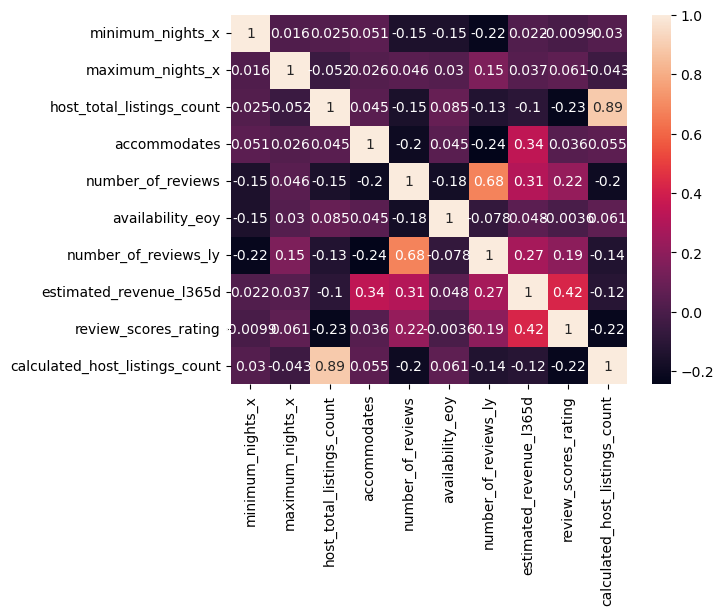

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

to_drop = [
    'reviewer_id',
    'reviews_per_month',
    'listing_id',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'host_id',
    'minimum_minimum_nights',
    'maximum_minimum_nights',
    'minimum_maximum_nights',
    'maximum_maximum_nights',
    'minimum_nights_avg_ntm',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'estimated_occupancy_l365d',
    'id_y',
    'id_x',
    'latitude',
    'longitude',
    'review_scores_location',
    'review_scores_communication',
    'host_listings_count',
    'maximum_nights_avg_ntm',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'beds',
    'review_scores_value',
    'bathrooms',
    'bedrooms',
    'minimum_nights_y',
    'maximum_nights_y'
]

correlation_matrix = numeric_columns.corr().dropna(how='all', axis=1).dropna(how='all', axis=0).drop(index=to_drop, columns=to_drop, errors='ignore')


sns.heatmap(correlation_matrix, annot=True)
plt.show()

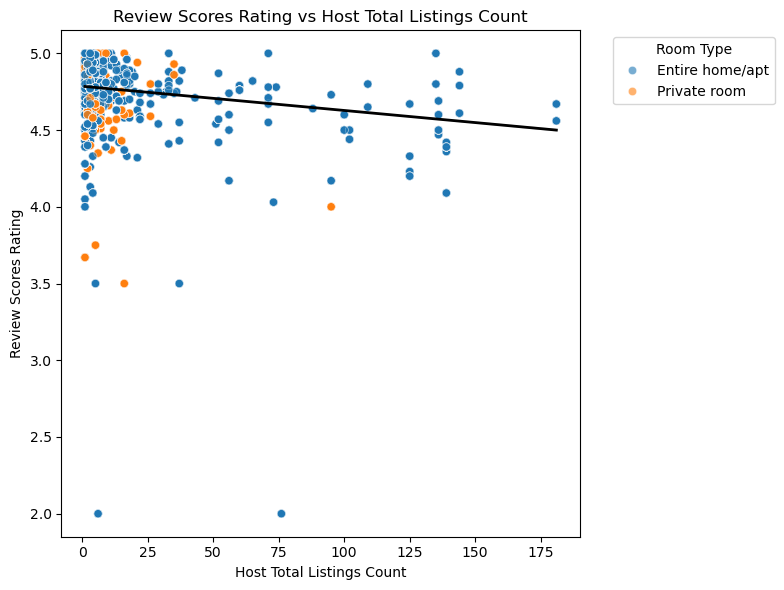

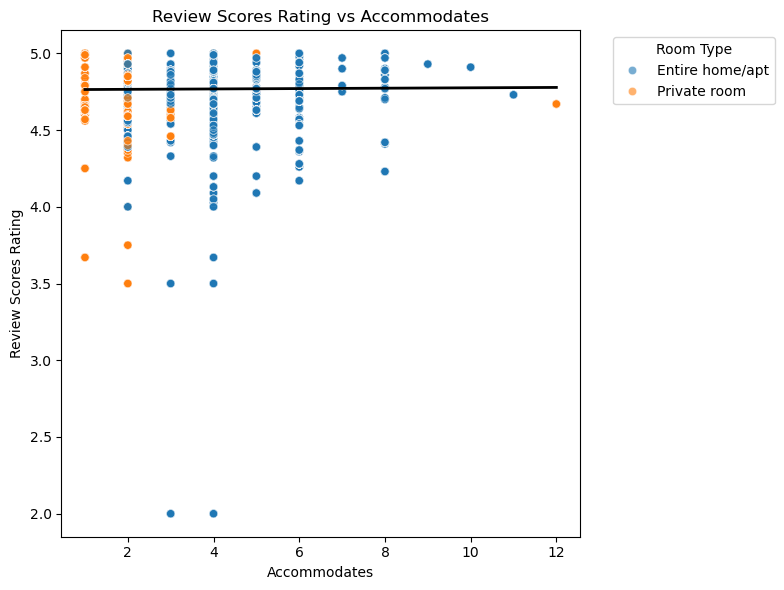

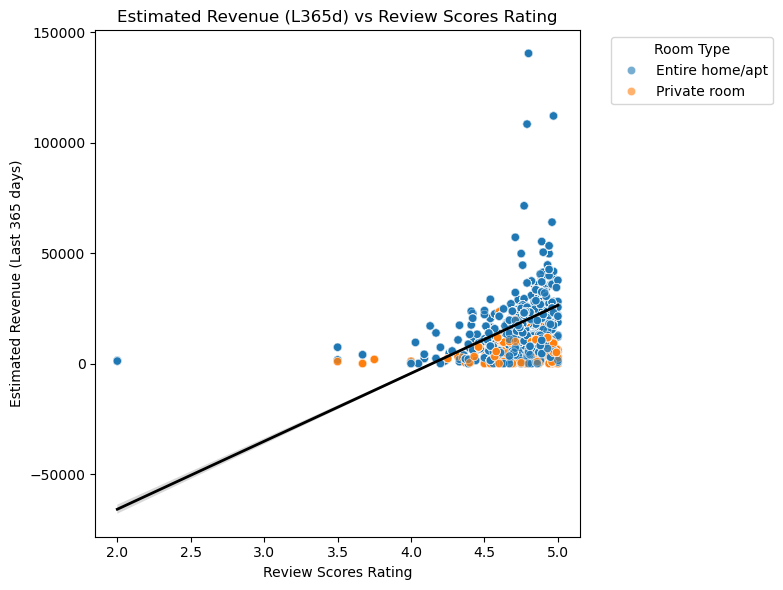

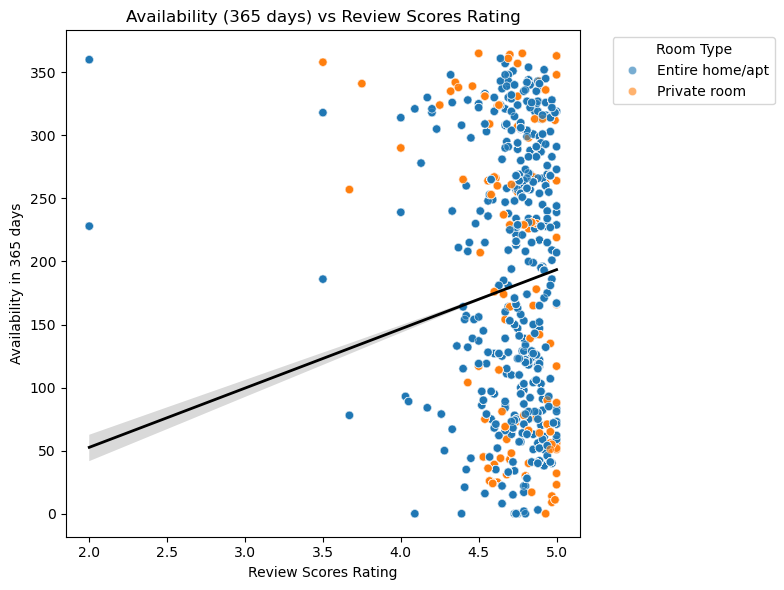

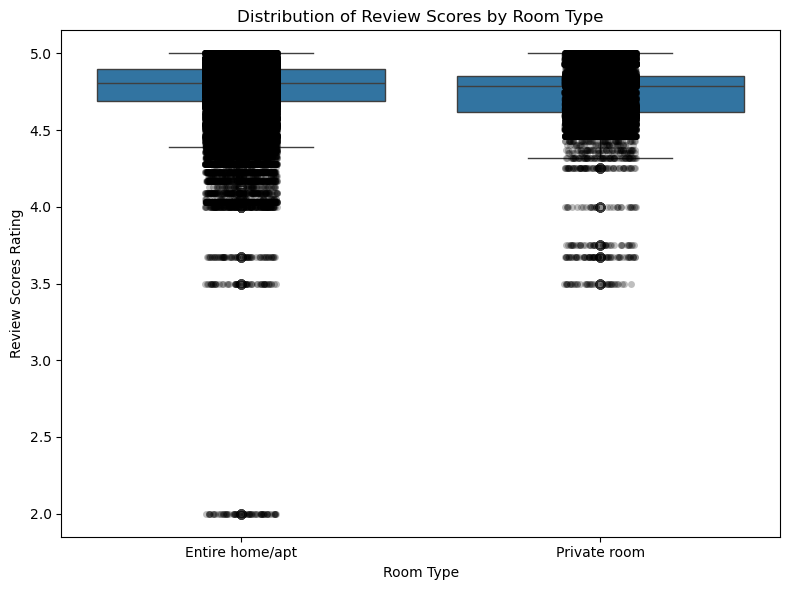

In [46]:
# Scatter plots exploring relationships between key features in df

# Prepare a clean subset to avoid NaNs affecting plots
plot_df = df[
    [
        'review_scores_rating',
        'host_total_listings_count',
        'accommodates',
        'estimated_revenue_l365d',
        'availability_365',
        'room_type'
    ]
].dropna()

# 1) Review score vs host's total listings count
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=plot_df,
    x='host_total_listings_count',
    y='review_scores_rating',
    hue='room_type',
    alpha=0.6
)
sns.regplot(
    data=plot_df,
    x='host_total_listings_count',
    y='review_scores_rating',
    scatter=False,
    color='black',
    line_kws={'lw': 2}
)
plt.title('Review Scores Rating vs Host Total Listings Count')
plt.xlabel('Host Total Listings Count')
plt.ylabel('Review Scores Rating')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2) Review score vs accommodates
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=plot_df,
    x='accommodates',
    y='review_scores_rating',
    hue='room_type',
    alpha=0.6
)
sns.regplot(
    data=plot_df,
    x='accommodates',
    y='review_scores_rating',
    scatter=False,
    color='black',
    line_kws={'lw': 2}
)
plt.title('Review Scores Rating vs Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Review Scores Rating')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3) Estimated revenue vs review score
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=plot_df,
    x='review_scores_rating',
    y='estimated_revenue_l365d',
    hue='room_type',
    alpha=0.6
)
sns.regplot(
    data=plot_df,
    x='review_scores_rating',
    y='estimated_revenue_l365d',
    scatter=False,
    color='black',
    line_kws={'lw': 2}
)
plt.title('Estimated Revenue (L365d) vs Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Estimated Revenue (Last 365 days)')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4) Availability days vs review score
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=plot_df,
    x='review_scores_rating',
    y='availability_365',
    hue='room_type',
    alpha=0.6
)
sns.regplot(
    data=plot_df,
    x='review_scores_rating',
    y='availability_365',
    scatter=False,
    color='black',
    line_kws={'lw': 2}
)
plt.title('Availability (365 days) vs Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Availability in 365 days')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 5) Boxplot of review scores by room type
plt.figure(figsize=(8, 6))
sns.boxplot(data=plot_df, x='room_type', y='review_scores_rating')
sns.stripplot(data=plot_df, x='room_type', y='review_scores_rating', color='black', alpha=0.25)
plt.title('Distribution of Review Scores by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Review Scores Rating')
plt.tight_layout()
plt.show()

### 1. Data Loading & Sampling
**What we did:**
We loaded the three primary datasets (`calendar`, `listings`, `reviews`) and the `neighbourhoods` file. To ensure our initial development pipeline runs quickly and efficiently, we applied a random sample of 10% (`frac=0.1`) to each dataset.

**Why:**
Working with the full dataset during the development phase can be computationally expensive and slow. Sampling allows us to prototype our cleaning and feature engineering steps rapidly. We used a fixed `random_state=42` to ensure reproducibility.

### 2. Data Merging
**What we did:**
We created a unified dataframe `df` by performing an **inner join** across the datasets:
1.  Merged `calendar` with `listings` on `listing_id` = `id`.
2.  Merged the result with `reviews` on `listing_id`.

**Why:**
Our goal is to predict availability based on listing attributes and past reviews. An inner join ensures we only analyze listings that possess complete information across all three sources (availability data, property details, and guest feedback), eliminating incomplete records immediately.

### 3. Correlation Analysis
**What we did:**
We generated a correlation matrix for numerical features but explicitly dropped a large list of columns (e.g., `availability_30`, `host_id`, `latitude`, `review_scores_accuracy`).

**Why:**
*   **Data Leakage:** Columns like `availability_30` or `availability_60` are directly correlated with our target (`availability_365` or specific dates) and would not be available if we were predicting for a future date in a real-world scenario.
*   **Redundancy:** Columns like `minimum_minimum_nights` vs `minimum_nights` often carry duplicate information.
*   **Irrelevance:** IDs (`host_id`, `reviewer_id`) are categorical identifiers, not numerical features, and their mathematical correlation is meaningless.

### 4. Bivariate Analysis (Visualizations)
**What we did:**
We used scatter plots and box plots to explore relationships between `review_scores_rating` and key metrics like revenue, availability, and host size, segmented by `room_type`.

**Key Insights Sought:**
*   **Quality vs. Quantity:** Does a host with many listings (`host_total_listings_count`) suffer from lower review scores due to divided attention?
*   **Price/Revenue vs. Satisfaction:** Do more expensive or higher-revenue properties actually yield better guest satisfaction?
*   **Room Type Impact:** How does the distribution of review scores differ between `Entire home/apt` and `Private room`?